# PRCP - 1001 - RiceLeaf

## Table of Contents

##### 1. Importing Necessary Libraries
##### 2. Load Datasets
##### 3. Exploratory Data Analysis (EDA)
##### 4. Data Preprocessing
##### 5. Model Implementation and Model Evaluation
##### 6. Data Augmentation (as Hyperparameter Tuning)
##### 7. Model Comparison Report
##### 8. Challenges Faced Report
##### 9. Conclusion

## Business Case

### To classify rice diseases into bacterial leaf blight, brown spot, and leaf smut using CNN-based image analysis for accurate and timely intervention.


## Objectives

- **Exploratory Data Analysis (EDA):** Analyze the image dataset to identify patterns, trends, and anomalies, focusing on class distribution across rice diseases: bacterial leaf blight, brown spot, and leaf smut.

- **Data Preparation:** Clean, preprocess, and structure the images for compatibility with Convolutional Neural Networks (CNN), including resizing images, normalization (scaling pixel values), and data augmentation (rotations, flips, zooms, brightness adjustments, and shifts).

- **Data Augmentation:** Apply techniques such as:
  - **Rotations:** Randomly rotate images to simulate different orientations.
  - **Flips:** Apply horizontal and vertical flips to increase dataset variability.
  - **Zooms:** Randomly zoom in or out to account for varying distances.
  - **Brightness Adjustments:** Vary image brightness to mimic real-world lighting conditions.
  - **Shifts:** Shift images horizontally or vertically to create diverse perspectives.

- **Model Building:** Design and implement a CNN architecture with convolutional, max pooling, dropout, and fully connected layers to classify rice diseases into the three specified classes.

- **Model Selection and Training:** Train the CNN model with and without data augmentation, comparing their performance to determine the most effective architecture for image classification.

- **Hyperparameter Optimization:** Fine-tune parameters such as learning rate, batch size, and the number of layers or units to improve the CNN model's performance.

- **Performance Evaluation:** Evaluate the CNN model's accuracy, precision, recall, F1-score, and confusion matrix to assess its classification capabilities on the rice disease dataset.

- **Model Interpretation:** Visualize learned filters and activation maps to understand the model's focus areas and provide insights into the features driving classification decisions.


## Importing Necessary Libraries

In [6]:
# Data Manipulation and Numerical Libraries
import pandas as pd  
import numpy as np  
import random 

# Path Handling
import pathlib

# Image Processing Libraries
import PIL
import cv2
# Data Visualization Libraries
import matplotlib.pyplot as plt  
%matplotlib inline  
import seaborn as sns  

# Handling Warnings and Debugging  
import warnings  
warnings.filterwarnings('ignore')  

# Data Splitting and Model Tuning
from sklearn.model_selection import train_test_split 

# Machine Learning and Deep Learning Frameworks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as b_end, layers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow import keras

# Neural Network Layers and Optimization
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model Evaluation and Performance Metrics
from sklearn.metrics import (f1_score, 
            accuracy_score, 
            precision_score, 
            recall_score, 
            classification_report,
            confusion_matrix,
            ConfusionMatrixDisplay) 

## Loading Data

In [8]:
image_size = 256
batch_size = 16
channels = 3
epochs = 30

In [9]:
df = tf.keras.preprocessing.image_dataset_from_directory(directory="datasets",
                                                    shuffle=True,
                                                    image_size=(image_size,image_size),
                                                    batch_size=batch_size)
                                                    

Found 119 files belonging to 3 classes.


In [10]:
class_names = df.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

### **Insights**
- **Dataset Size:** The dataset consists of **119 images** across **3 classes**: bacterial leaf blight, brown spot, and leaf smut. The small size requires caution against overfitting.

## Exploratory Data Analysis

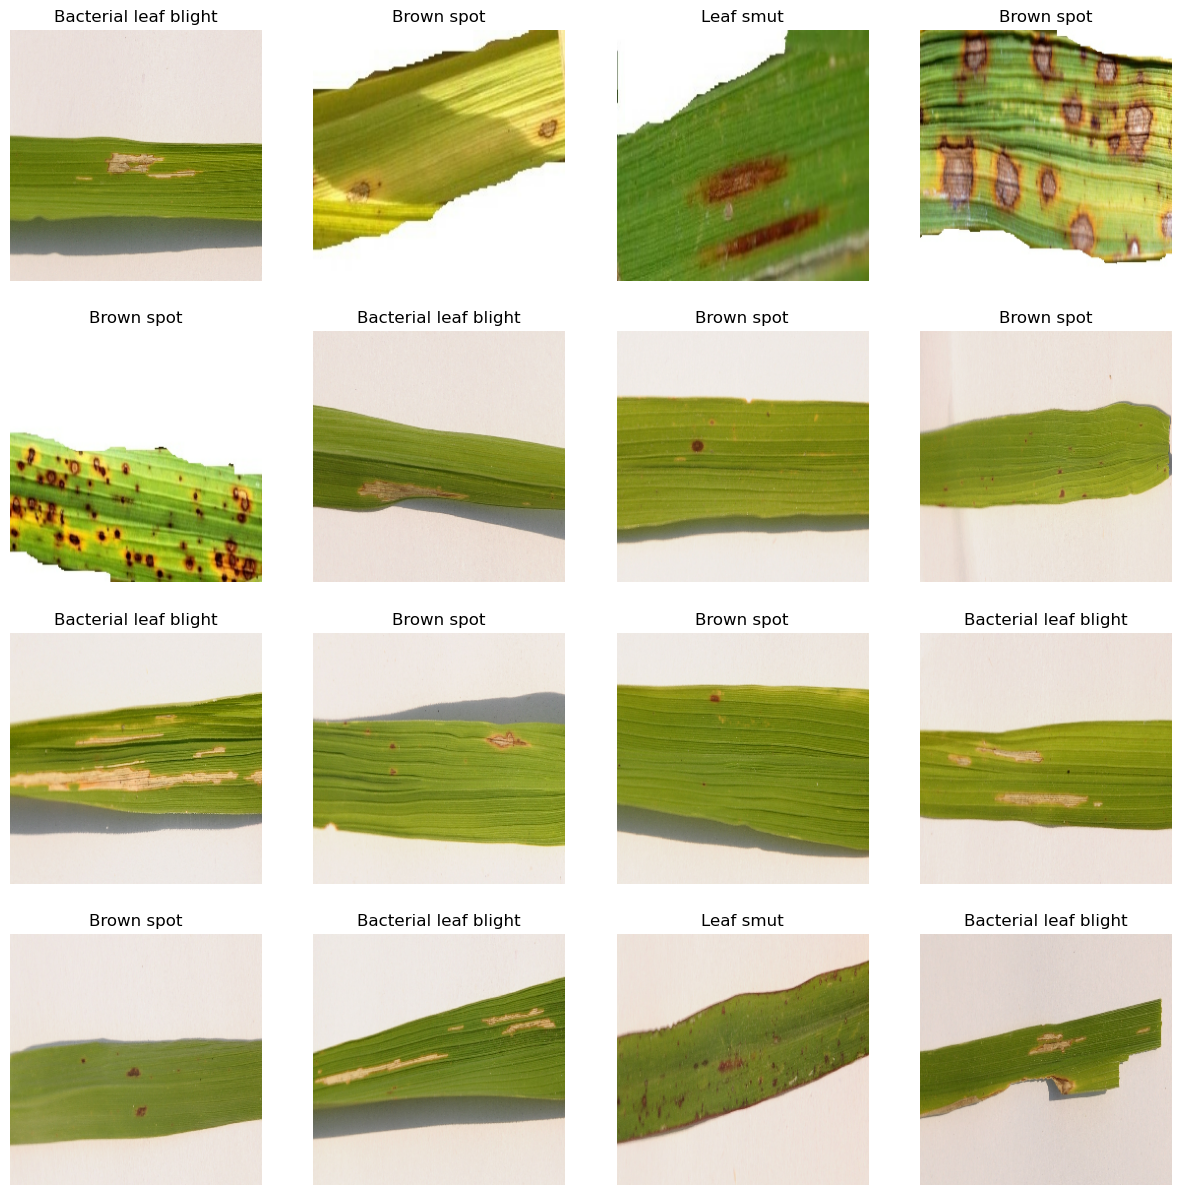

In [13]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in df.take(1): 
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))   
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis('off')

In [14]:
data_dir = pathlib.Path("C:\\Users\sivas\Desktop\DATAMITES\CAPSTONE PROJECTS\Rice leaf")
print(data_dir)

C:\Users\sivas\Desktop\DATAMITES\CAPSTONE PROJECTS\Rice leaf


In [15]:
blight = list(data_dir.rglob('datasets/Bacterial leaf blight/DSC*.jpg'))
print('Length of Bacterial leaf blight', len(blight))
spot = list(data_dir.rglob('datasets/Brown spot/DSC*.jpg'))
print('Length of Brown spot', len(spot))
smut = list(data_dir.rglob('datasets/Leaf smut/DSC*.jpg'))
print('Length of Leaf smut', len(smut))

Length of Bacterial leaf blight 40
Length of Brown spot 40
Length of Leaf smut 39


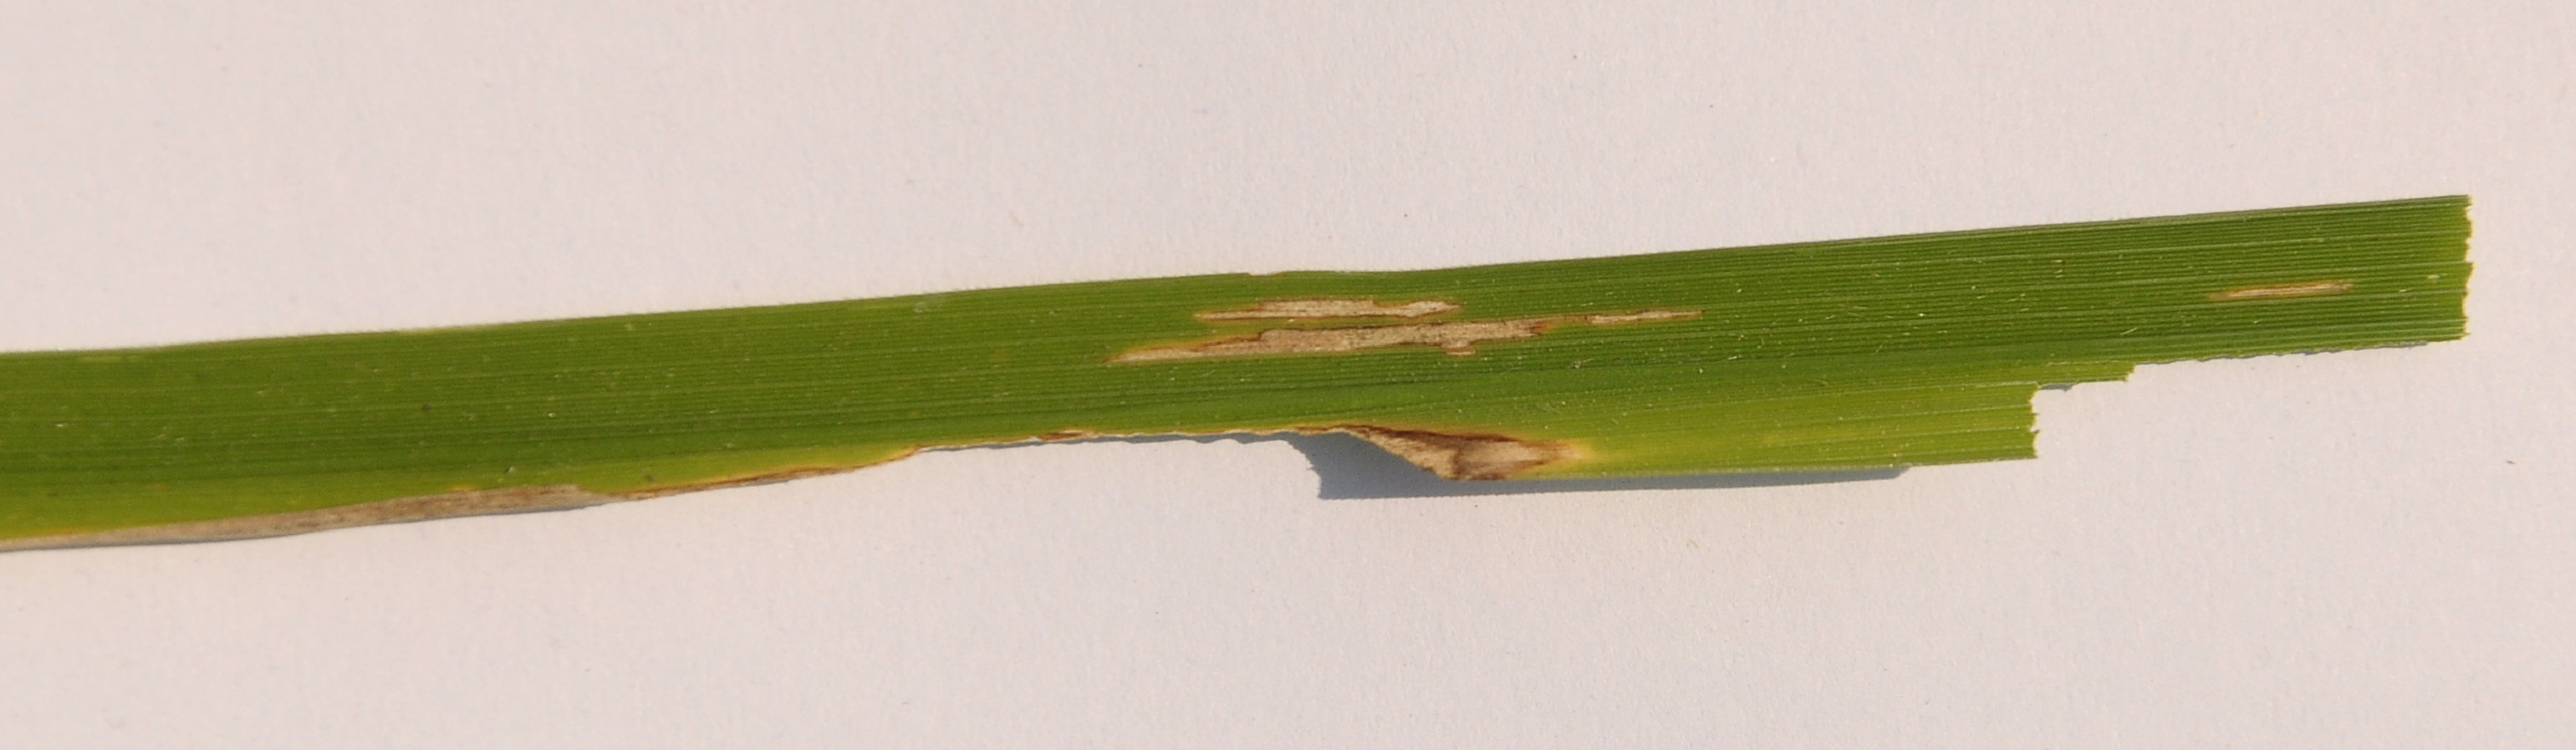

In [16]:
PIL.Image.open(blight[0])

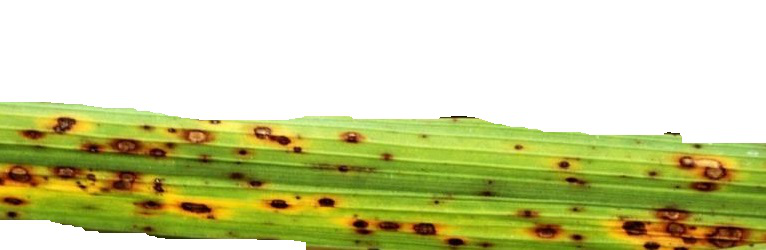

In [17]:
PIL.Image.open(spot[0])

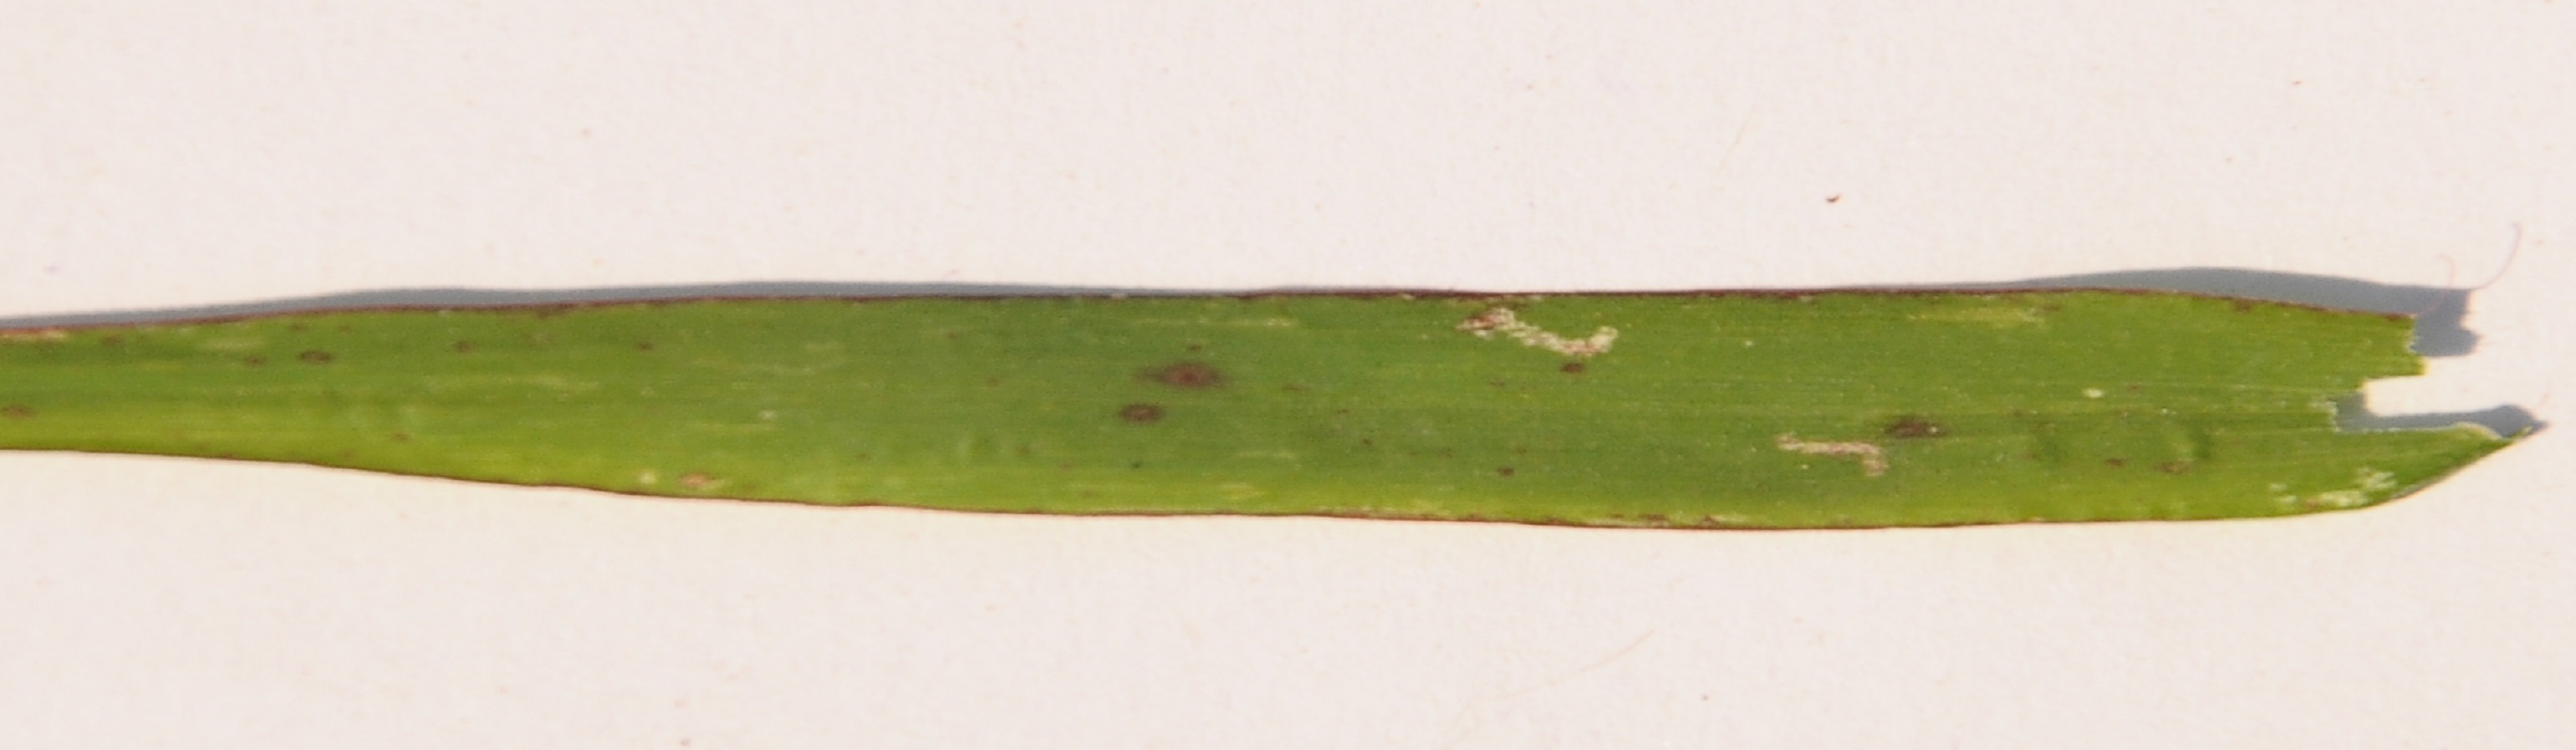

In [18]:
PIL.Image.open(smut[0])

### **Insights**
- **Visualized** the first batch of images in a 4x4 grid with **labels**.
- Checked for correct **dataset loading** and alignment of images with **labels**.
- **Inspected** individual images for **mislabeling** or **poor quality**.

## Feature Engineering / Data Preprocessing

In [25]:
leaf_image = {'blight':list(data_dir.rglob('datasets/Bacterial leaf blight/DSC*.jpg')),
                'spot': list(data_dir.rglob('datasets/Brown spot/DSC*.jpg')),
                    'smut':list(data_dir.rglob('datasets/Leaf smut/DSC*.jpg'))}

In [26]:
leaf_labels = {'blight':0,
              'spot':1,
              'smut':2}

In [27]:
x,y=[],[]
for img_name,img_file in leaf_image.items():
    for image in img_file:
        img = cv2.imread(image)
        x.append(cv2.resize(img,(256,256)))
        y.append(leaf_labels[img_name])

In [28]:
x = np.array(x)
y= np.array(y)

In [29]:
x.shape, y.shape

((119, 256, 256, 3), (119,))

#### Data Splitting

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.20) 

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((95, 256, 256, 3), (95,), (24, 256, 256, 3), (24,))

In [36]:
x_train_scal = x_train/255
x_test_scal = x_test/255

In [39]:
pd.Series(y_train).value_counts()

0    32
1    32
2    31
Name: count, dtype: int64

In [40]:
pd.Series(y_test).value_counts()

2    8
0    8
1    8
Name: count, dtype: int64

### **Insights**

- **Balanced Dataset**: Stratified splitting ensured equal class representation in both training and testing sets.
- **Consistent Image Preprocessing**: Resizing all images to **256x256 pixels** maintained uniform input size for the model.
- **Efficient Label Mapping**: Clear mapping of classes to numerical labels facilitated smooth model training.
- **Normalized Data**: Scaling the image data by dividing by **255** ensured pixel values were in the range [0, 1], improving model convergence.


## Model Implementation and Model Evaluation

### Convolutional Neural Networks (CNN) without Data Augmentation

In [309]:
b_end.clear_session()
num_of_classes = 3
cnn = Sequential([
    layers.InputLayer(shape=(256,256,3)),
    layers.Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),  
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),  
    layers.Dropout(0.2),
    layers.Dense(num_of_classes,activation='softmax')          
])
cnn.summary()

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
            metrics = ['accuracy'])
checkpoint = ModelCheckpoint('cnn.weights.h5',
                                monitor='val_loss',
                                verbose=1,
                                save_best_only=True,
                                save_weights_only=True,
                                mode='min')

early_stop = EarlyStopping(monitor='val_loss',
                                patience=10,
                                verbose=1,
                                mode='min',
                                restore_best_weights=True)

history = cnn.fit(x_train_scal,y_train,epochs=50,validation_split=0.1, callbacks=[checkpoint,early_stop])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,109,347 (4.23 MB)

 Trainable params: 1,109,347 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.2178 - loss: 1.4303
Epoch 1: val_loss improved from inf to 1.06429, saving model to cnn.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 958ms/step - accuracy: 0.2251 - loss: 1.4565 - val_accuracy: 0.4000 - val_loss: 1.0643
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.3403 - loss: 1.1146
Epoch 2: val_loss did not improve from 1.06429
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - accuracy: 0.3346 - loss: 1.1128 - val_accuracy: 0.2000 - val_loss: 1.1057
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.2530 - loss: 1.0906
Epoch 3: val_loss did not improve from 1.06429
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 715ms/step - accuracy: 0.2662 - loss: 1.0894 - val_accuracy: 0.5000 - val_loss: 1.0736
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.4563 - loss: 1.0459
Epoch 4: val_loss did not improve from 1.06429
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - accuracy: 0.4540 - loss: 1.0474 - val_accuracy: 0.4000 - v

### MODEL EVALUATION

In [310]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(x_test_scal, y_test) 
cnn_test_loss, cnn_test_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.7083 - loss: 0.7501


(0.7501466870307922, 0.7083333134651184)

In [311]:
cnn_train_loss, cnn_train_accuracy = cnn.evaluate(x_train_scal, y_train) 
cnn_train_loss, cnn_train_accuracy

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 1.0000 - loss: 0.0403


(0.045514289289712906, 1.0)

In [312]:
ypred = cnn.predict(x_test_scal)
ypred = np.argmax(ypred,axis= 1)
ypred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2,
       1, 2], dtype=int64)

In [313]:
f1_cnn_test = f1_score(y_test,ypred,average='macro')
acc_cnn_test = accuracy_score(y_test,ypred)
pre_cnn_test = precision_score(y_test,ypred,average='macro')
re_cnn_test = recall_score(y_test,ypred,average='macro')
f1_cnn_test, acc_cnn_test, pre_cnn_test, re_cnn_test

(0.7018602312719958,
 0.7083333333333334,
 0.7259259259259259,
 0.7083333333333334)

In [314]:
ypred_train = cnn.predict(x_train_scal)
ypred_train = np.argmax(ypred_train,axis= 1)
ypred_train

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step


array([2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1], dtype=int64)

In [315]:
f1_cnn_train = f1_score(y_train,ypred_train,average='macro')
acc_cnn_train = accuracy_score(y_train,ypred_train)
pre_cnn_train = precision_score(y_train,ypred_train,average='macro')
re_cnn_train = recall_score(y_train,ypred_train,average='macro')
f1_cnn_train, acc_cnn_test, pre_cnn_test, re_cnn_test

(1.0, 0.7083333333333334, 0.7259259259259259, 0.7083333333333334)

In [316]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.60      0.75      0.67         8
           2       0.78      0.88      0.82         8

    accuracy                           0.71        24
   macro avg       0.73      0.71      0.70        24
weighted avg       0.73      0.71      0.70        24



In [317]:
print(classification_report(y_train, ypred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        31

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95



In [318]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

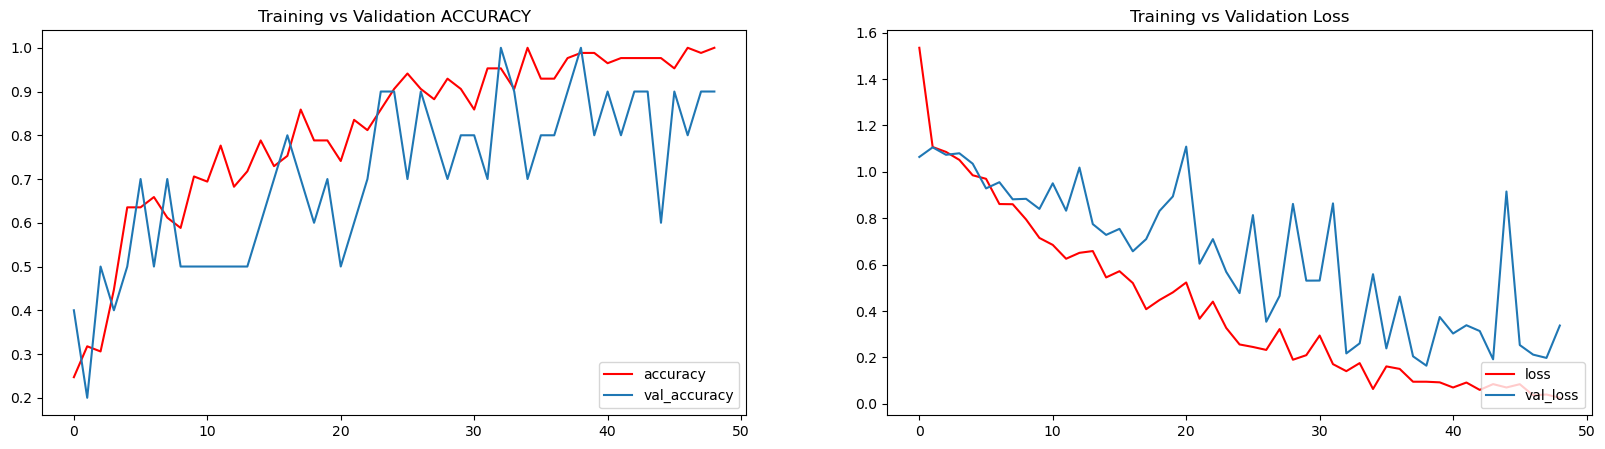

In [330]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(49),acc, color='red',label = 'accuracy')
plt.plot(range(49),val_acc, label ='val_accuracy')
plt.legend(loc='lower right')
plt.title("Training vs Validation ACCURACY")

plt.subplot(1,2,2)
plt.plot(range(49),loss, color='red',label = 'loss')
plt.plot(range(49),val_loss, label ='val_loss')
plt.legend(loc='lower right')
plt.title("Training vs Validation Loss")
plt.show()

In [332]:
cm = confusion_matrix(y_test,ypred)

In [334]:
cm

array([[4, 3, 1],
       [1, 6, 1],
       [0, 1, 7]], dtype=int64)

## DATA AUGMENTATION

In [363]:
data_aug_final = keras.Sequential([
    layers.RandomFlip('horizontal',input_shape=(256,256,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

### CNN WITH DATA AUGMENTATION

In [127]:
b_end.clear_session()
num_of_classes = 3
cnn_aug = Sequential([
    data_aug_final,    
    layers.Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),  
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),  
    layers.Dropout(0.2),                       
    layers.Dense(num_of_classes,activation='softmax')          
])
cnn_aug.summary()

cnn_aug.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
            metrics = ['accuracy'])

checkpoint = ModelCheckpoint('cnn_aug.weights.h5',
                                monitor='val_loss',
                                verbose=1,
                                save_best_only=True,
                                save_weights_only=True,
                                mode='min')

early_stop = EarlyStopping(monitor='val_loss',
                                patience=10,
                                verbose=1,
                                mode='min',
                                restore_best_weights=True)

history_aug = cnn_aug.fit(x_train_scal,y_train,epochs=50,validation_split=0.1, callbacks=[checkpoint, early_stop])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,109,347 (4.23 MB)

 Trainable params: 1,109,347 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.3116 - loss: 1.1348
Epoch 1: val_loss improved from inf to 1.05619, saving model to cnn_aug.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3190 - loss: 1.1364 - val_accuracy: 0.4000 - val_loss: 1.0562
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.3534 - loss: 1.1126
Epoch 2: val_loss improved from 1.05619 to 1.05617, saving model to cnn_aug.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3621 - loss: 1.1087 - val_accuracy: 0.8000 - val_loss: 1.0562
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.3963 - loss: 1.0492
Epoch 3: val_loss improved from 1.05617 to 1.00293, saving model to cnn_aug.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3914 - loss: 1.0527 - val_accuracy: 0.7000 - val_loss: 1.0029
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.4694 - loss: 0.9927
Epoch 4: val_loss did not improve from 1.00293
3/3 ━━━━━━━━━━━━━━━━━━━━

### MODEL EVALUATION

In [336]:
cnn_aug_test_loss, cnn_aug_test_accuracy = cnn_aug.evaluate(x_test_scal, y_test) 
cnn_aug_test_loss, cnn_aug_test_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8750 - loss: 0.5453


(0.5453282594680786, 0.875)

In [338]:
cnn_aug_train_loss, cnn_aug_train_accuracy = cnn_aug.evaluate(x_train_scal, y_train) 
cnn_aug_train_loss, cnn_aug_train_accuracy

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.8494 - loss: 0.3933


(0.43012920022010803, 0.8315789699554443)

In [340]:
ypred_aug = cnn_aug.predict(x_test_scal)
ypred_aug = np.argmax(ypred_aug,axis= 1)
ypred_aug

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


array([0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       0, 0], dtype=int64)

In [342]:
f1_cnn_aug_test = f1_score(y_test,ypred_aug,average='macro')
acc_cnn_aug_test = accuracy_score(y_test,ypred_aug)
pre_cnn_aug_test = precision_score(y_test,ypred_aug,average='macro')
re_cnn_aug_test = recall_score(y_test,ypred_aug,average='macro')
f1_cnn_aug_test, acc_cnn_aug_test, pre_cnn_aug_test, re_cnn_aug_test

(0.866432042902631, 0.875, 0.8962962962962964, 0.875)

In [344]:
ypred_aug_train = cnn.predict(x_train_scal)
ypred_aug_train = np.argmax(ypred_aug_train,axis= 1)
ypred_aug_train

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step


array([2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1], dtype=int64)

In [346]:
f1_cnn_aug_train = f1_score(y_train,ypred_aug_train,average='macro')
acc_cnn_aug_train = accuracy_score(y_train,ypred_aug_train)
pre_cnn_aug_train = precision_score(y_train,ypred_aug_train,average='macro')
re_cnn_aug_train = recall_score(y_train,ypred_aug_train,average='macro')
f1_cnn_aug_train, acc_cnn_aug_train, pre_cnn_aug_train, re_cnn_aug_train

(1.0, 1.0, 1.0, 1.0)

In [348]:
print(classification_report(y_test, ypred_aug))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.62      0.77         8
           2       0.89      1.00      0.94         8

    accuracy                           0.88        24
   macro avg       0.90      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



In [350]:
print(classification_report(y_train, ypred_aug_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        31

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95



In [352]:
acc_aug = history_aug.history['accuracy']
loss_aug = history_aug.history['loss']
val_acc_aug = history_aug.history['val_accuracy']
val_loss_aug = history_aug.history['val_loss']

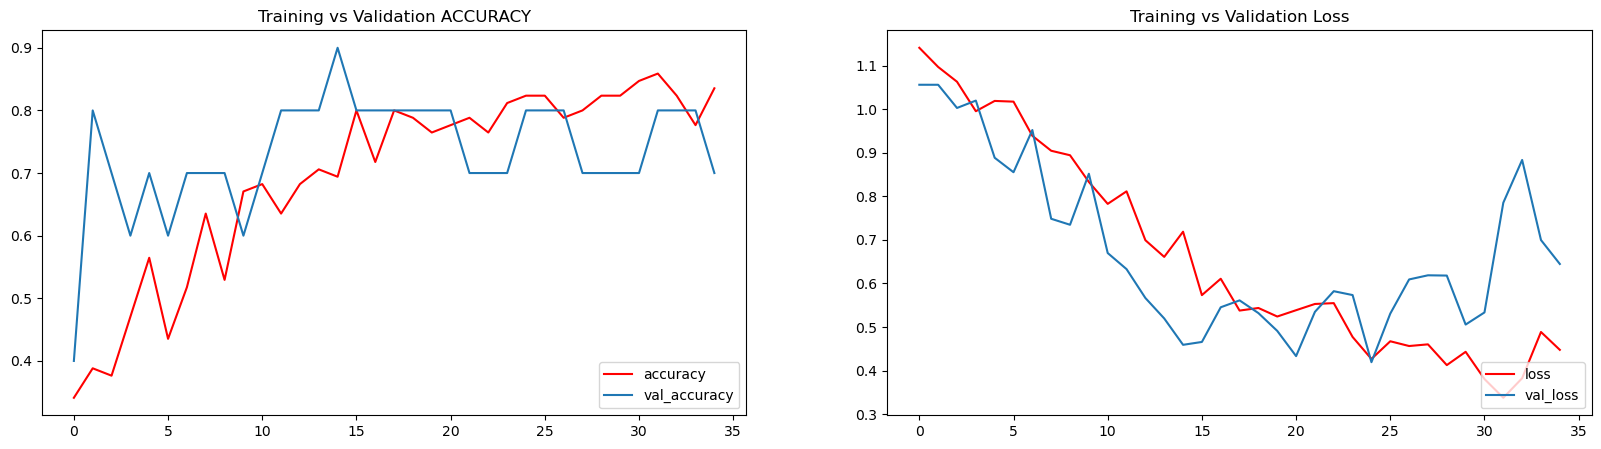

In [354]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(35),acc_aug, color='red',label = 'accuracy')
plt.plot(range(35),val_acc_aug, label ='val_accuracy')
plt.legend(loc='lower right')
plt.title("Training vs Validation ACCURACY")

plt.subplot(1,2,2)
plt.plot(range(35),loss_aug, color='red',label = 'loss')
plt.plot(range(35),val_loss_aug, label ='val_loss')
plt.legend(loc='lower right')
plt.title("Training vs Validation Loss")
plt.show()

In [356]:
cm_aug = confusion_matrix(y_test,ypred_aug)

In [358]:
cm_aug

array([[8, 0, 0],
       [2, 5, 1],
       [0, 0, 8]], dtype=int64)

## Model Evaluation & Comparison

In [367]:
model_names = ['CNN', 'CNN_WITH_AUGMENTATION']

f1_test = [f1_cnn_test,f1_cnn_aug_test]

f1_train = [f1_cnn_train,f1_cnn_aug_train]

accuracy_test = [acc_cnn_test,acc_cnn_aug_test]

accuracy_train = [acc_cnn_train,acc_cnn_aug_train]

precision_test = [pre_cnn_test,pre_cnn_aug_test]

precision_train = [pre_cnn_train,pre_cnn_aug_train]

recall_test = [re_cnn_test,re_cnn_aug_test]

recall_train = [re_cnn_train,re_cnn_aug_train]

In [371]:
model_scores = pd.DataFrame({"Model":model_names,
                             "F1_test":f1_test,
                             "F1_train":f1_train,
                             "Accuracy_test":accuracy_test,
                             "Accuracy_train":accuracy_train,
                            "Precision_test": precision_test,
                             "Precision_train": precision_train,
                             "Recall_test": recall_test,
                             "Recall_train": recall_train
                            })

## Model Comparison Report

In [374]:
model_scores

Model   F1_test  F1_train  Accuracy_test  Accuracy_train  \
0                    CNN  0.701860       1.0       0.708333             1.0   
1  CNN_WITH_AUGMENTATION  0.866432       1.0       0.875000             1.0   

   Precision_test  Precision_train  Recall_test  Recall_train  
0        0.725926              1.0     0.708333           1.0  
1        0.896296              1.0     0.875000           1.0

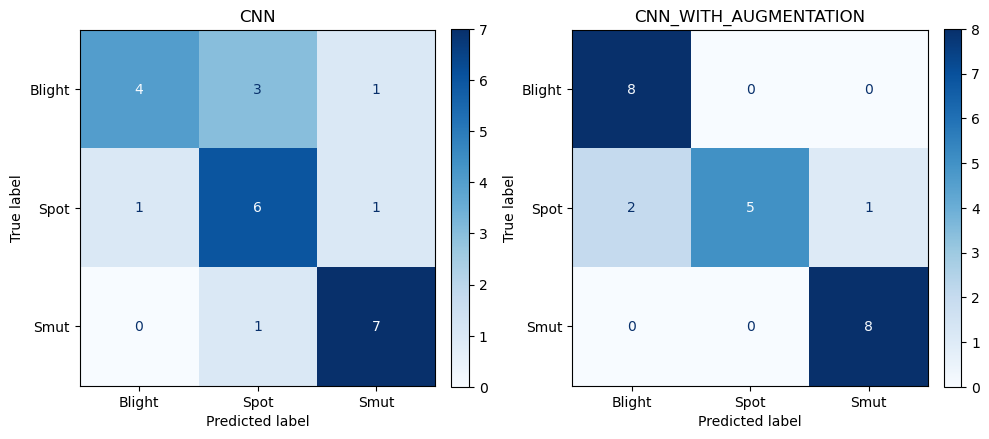

In [376]:
cm_display = [cm,cm_aug]
cm_models = ['CNN', 'CNN_WITH_AUGMENTATION']
w=1
plt.figure(figsize=(10, 15))
for i,models in zip(cm_display,cm_models):
    display = ConfusionMatrixDisplay(confusion_matrix=i, display_labels=["Blight", "Spot","Smut"])
    plt.subplot(1,2,w)
    display.plot(cmap = 'Blues',ax= plt.gca(),colorbar=False)
    im = display.im_ 
    cbar = plt.colorbar(im, ax=plt.gca(), shrink=0.6, fraction=0.046, pad=0.04)  
    plt.title(models)
    w+=1
plt.tight_layout()
plt.show()

### **Confusion Matrix Analysis: CNN vs. CNN with Data Augmentation**

The confusion matrices compare the performance of a standard CNN and a CNN with data augmentation in classifying three plant diseases: **Blight**, **Spot**, and **Smut**.

- **Standard CNN**: Misclassifications were observed, with **3 instances of Blight misclassified as Spot** and **1 instance of Spot misclassified as Smut**. This indicates some limitations in the model’s ability to generalize across the classes.

- **CNN with Data Augmentation**: Showed a **significant improvement in classification accuracy**, especially for **Blight**. The augmented model achieved near-perfect classification for Blight and Smut and reduced misclassifications across all classes, demonstrating enhanced robustness and generalization.

**Takeaway**: Data augmentation significantly improves model accuracy and robustness, particularly in cases of misclassifications, making it crucial for better performance in image classification tasks.


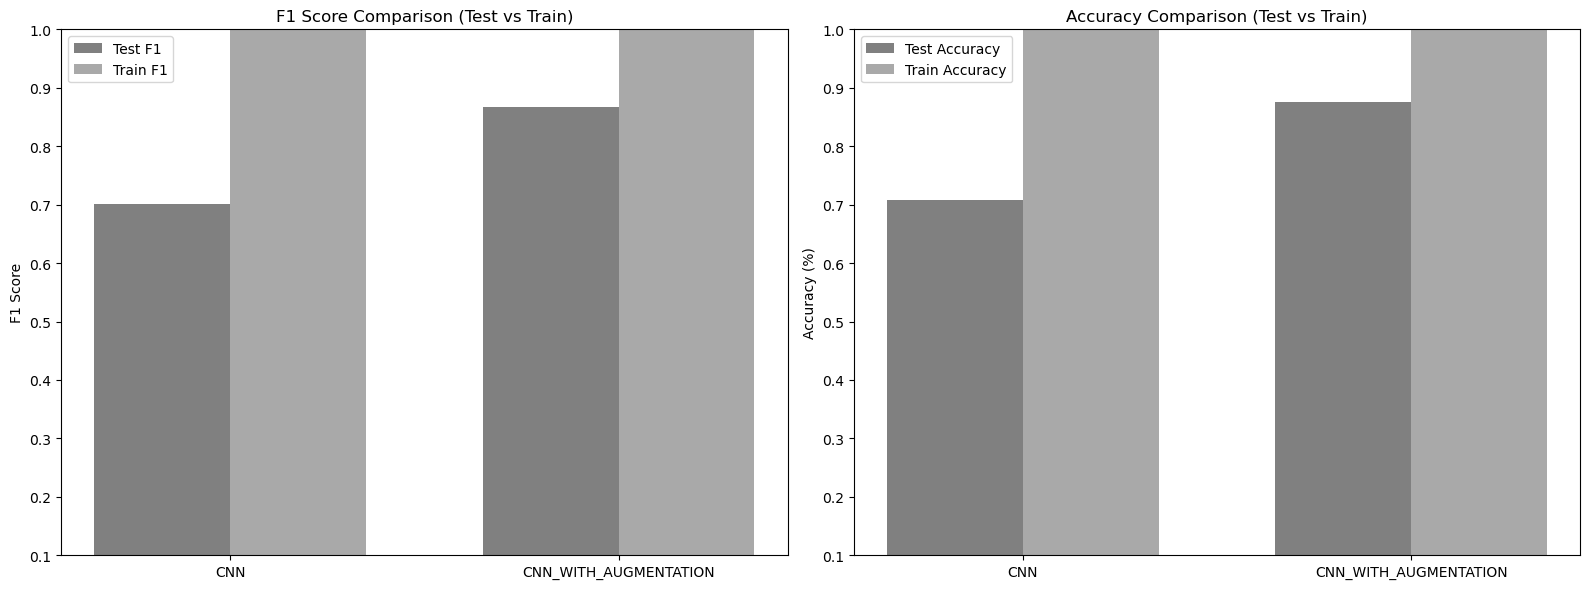

In [382]:
models = model_names

fig, axes = plt.subplots(1, 2, figsize=(16,6))
bar_width = 0.35
x = range(len(models))

axes[0].bar([p - bar_width / 2 for p in x], f1_test, bar_width, color='grey', label='Test F1')
axes[0].bar([p + bar_width / 2 for p in x], f1_train, bar_width, color='darkgrey', label='Train F1')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_title('F1 Score Comparison (Test vs Train)')
axes[0].set_ylabel('F1 Score')
axes[0].set_ylim(0.1, 1.0)
axes[0].legend()

axes[1].bar([p - bar_width / 2 for p in x], accuracy_test, bar_width, color='grey', label='Test Accuracy')
axes[1].bar([p + bar_width / 2 for p in x], accuracy_train, bar_width, color='darkgrey', label='Train Accuracy')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title('Accuracy Comparison (Test vs Train)')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_ylim(0.1, 1.0)
axes[1].legend()

plt.tight_layout()
plt.show()

### **Model Performance Overview by Scores**

#### **CNN without Data Augmentation**

- **F1-score (Test):** **70.19%**  
- **F1-score (Train):** **100%**  
- **Accuracy (Test):** **70.83%**  
- **Accuracy (Train):** **100%**  
- **Precision (Test):** **72.59%**  
- **Precision (Train):** **100%**  
- **Recall (Test):** **70.83%**  
- **Recall (Train):** **100%**

**Insights:**  
The CNN model exhibits a significant difference between training and test scores. The perfect training performance highlights overfitting, as the model has memorized the training data but struggles to generalize effectively to the test set.

---

#### **CNN with Data Augmentation**

- **F1-score (Test):** **86.64%**  
- **F1-score (Train):** **100%**  
- **Accuracy (Test):** **87.50%**  
- **Accuracy (Train):** **100%**  
- **Precision (Test):** **89.63%**  
- **Precision (Train):** **100%**  
- **Recall (Test):** **87.50%**  
- **Recall (Train):** **100%**

**Insights:**  
Data augmentation significantly enhanced the model's test performance. The F1-score and accuracy have improved substantially, and the gap between training and test metrics has narrowed. This indicates that the model generalizes better to unseen data, thanks to the variability introduced by augmentation.

## Challenges Faced

### **Key Insights**

- **Small Dataset Size**: The dataset consisted of **119 images** across **3 classes**: bacterial leaf blight, brown spot, and leaf smut, which posed a challenge for deep learning models. With such a limited dataset, **overfitting** was a key concern. The model may have learned patterns specific to the training data but struggled to generalize to unseen data. To mitigate this, **data augmentation** was employed to artificially increase the size of the dataset, improving the model's ability to generalize and reduce the risk of overfitting.

- **Class Imbalance**: Given the performance metrics, it’s likely that class imbalance was a factor in the model’s behavior, potentially affecting precision and recall. Balancing the dataset through techniques such as class weights or sampling strategies (e.g., oversampling the minority class) would have been beneficial for ensuring balanced predictions and mitigating the impact of overfitting on certain classes.

- **Image Preprocessing**: Preprocessing steps were crucial in preparing the images for model input. This included resizing the images, normalizing pixel values, and augmenting the dataset to generate variations such as rotations, flips, and scaling. These steps helped improve model robustness and reduce overfitting by providing a diverse range of training examples.

- **Model Complexity vs. Dataset Size**: Considering the small dataset, a more complex model like **CNN with Data Augmentation** proved beneficial. While a simple CNN model might have been prone to overfitting due to the limited data, the augmented model provided improved performance by leveraging synthetic data, which helped the model generalize better and mitigate overfitting.

- **Handling Image Data**: The limited number of images posed a challenge in ensuring the model could learn meaningful features without overfitting. Techniques like data augmentation, transfer learning, and careful regularization were essential to improve the model's generalization capability and prevent the model from memorizing specific details from the traiing data.


## Conclusion

### **Project Overview**

In this project, multiple machine learning models were developed and evaluated for the classification of rice diseases: **Bacterial Leaf Blight**, **Brown Spot**, and **Leaf Smut**. The performance of each model is summarized below:

- **CNN (Convolutional Neural Network)** achieved an F1-score of **70.19%** and accuracy of **70.83%** on the test set. However, there is a significant gap between training and test metrics (training accuracy: **100%**), indicating overfitting. The model achieved precision of **72.59%** and recall of **70.83%** on the test set, showing decent classification performance but limited ability to generalize.

- **CNN with Data Augmentation** outperformed the baseline CNN, achieving an F1-score of **86.64%** and accuracy of **87.50%** on the test set. With enhanced precision (**89.63%**) and recall (**87.50%**), this approach demonstrated superior generalization and robustness, addressing the overfitting issues present in the baseline CNN.

---

### **Key Takeaways**

- **CNN with Data Augmentation** proved to be the superior model, achieving substantial improvements in both F1-score and accuracy on the test dataset. By incorporating augmentation techniques, the model mitigated overfitting and improved generalization, making it a more robust choice for deployment.

- **Baseline CNN** showed strong performance on the training set but struggled to generalize to unseen data, as demonstrated by the performance gap between training and test results. While valuable as a baseline, this model highlights the importance of data augmentation and regularization methods when working with small datasets, such as the **119 images** across **3 classes** in this project.
